In [266]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
#Read csv file dataset into a Dataframe
df_set=pd.read_csv("used_cars.csv")

In [268]:
# View the Data frame
df_set

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [269]:
# Display feature columns
df_set.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [270]:
# The data type of the feature columns
df_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [271]:
# Replace the dollar sign and the commas in the price column data
df_set["price"] = df_set.price.str.replace("$","").str.replace(",", "")

#Convert the price column data from a string to a float
df_set["price"]=df_set["price"].astype("float64")


In [272]:
# Replace the "mi" string and commas from the milage column data
df_set["milage"] = df_set.milage.str.replace(",","").str.replace("mi.", "")

# Conver the milage column data fro a string to a float
df_set["milage"]=df_set["milage"].astype("float64")

In [273]:
# Display the new data type of the price column
df_set["price"].dtype

dtype('float64')

In [274]:
#Drop car brands with outlier average prices
df_set=df_set[df_set["brand"]!="Bugatti"]
df_set=df_set[df_set["brand"]!="Rolls-Royce"]
df_set=df_set[df_set["brand"]!="McLaren"]
df_set=df_set[df_set["brand"]!="Lamborghini"]
df_set=df_set[df_set["brand"]!="Ferrari"]

#Drop rows with Price above 100000
df_set=df_set[df_set["price"]< 100000]

# Drop rows with milage above 300000
df_set=df_set[df_set["milage"]< 300000]

# Print the first five rows of the new data frame
df_set.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


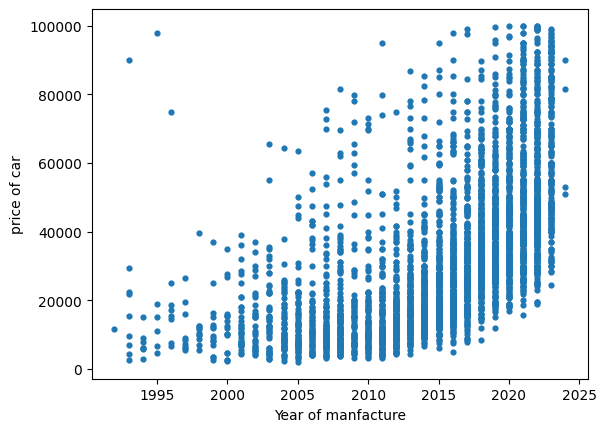

In [275]:
# A scatter plot to show the relation of year of manfacture and the price of the car
plt.scatter(df_set.model_year , df_set.price , s=12, marker='o')
plt.xlabel('Year of manfacture')
plt.ylabel('price of car')
plt.show ()


In [276]:
# The average price per car brand
brand_counts=df_set.groupby('brand')['price'].mean()
brand_counts.head()

brand
Acura    26194.936508
Alfa     37686.052632
Aston    51168.000000
Audi     34368.190476
BMW      38649.519231
Name: price, dtype: float64

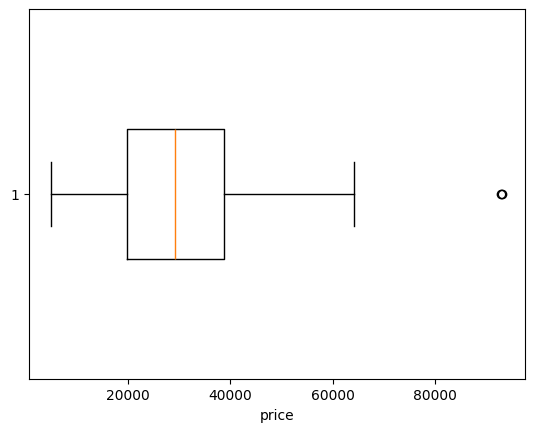

In [277]:
# boxplot to show medium car price and outliers
width = 0.35
plt.boxplot(brand_counts,widths=width ,vert=False)
plt.xlabel('price')
plt.show ()

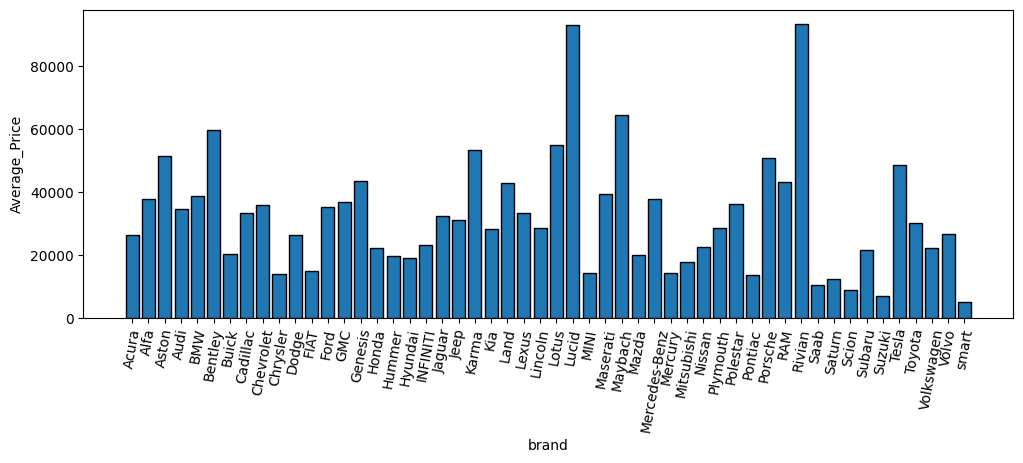

In [278]:
# A bar chart showing the average price of each car brand
plt.figure(figsize=(12, 4))
plt.bar(df_set['brand'].unique(), brand_counts ,  edgecolor = 'black')
plt.xticks(df_set['brand'].unique(), brand_counts.index, rotation=80,)
plt.xlabel('brand')
plt.ylabel('Average_Price')
plt.show ()


In [279]:
# Fuel type that is most expensive
fuel_prices=df_set.groupby('fuel_type')['price'].mean()
fuel_prices

fuel_type
Diesel            46741.388889
E85 Flex Fuel     22744.115108
Gasoline          32121.954120
Hybrid            45423.337017
Plug-In Hybrid    45946.176471
not supported     14000.000000
–                 20780.697674
Name: price, dtype: float64

In [280]:
# Fuel that is most consumed by car brands
fuel_consumption = df_set.groupby("fuel_type")["brand"].value_counts()
fuel_consumption=pd.DataFrame(fuel_consumption)
fuel_consumption

count
fuel_type brand               
Diesel    Ford              43
          RAM               18
          Mercedes-Benz     14
          Chevrolet         11
          GMC                7
...                        ...
–         Honda              1
          Jaguar             1
          Jeep               1
          Mercury            1
          Volvo              1

[125 rows x 1 columns]

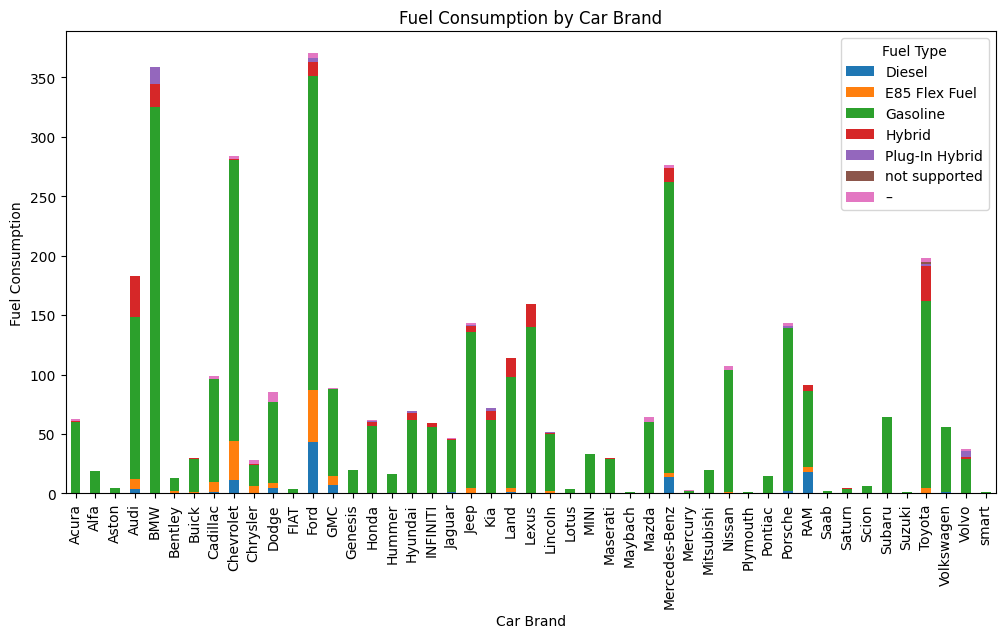

In [281]:
# A graph to show different fuel types consumptions by various car brands
# Pivot the data to create a Dataframe with brands as index and fuel types as columns
pivot_df=fuel_consumption.pivot_table(index="brand", columns="fuel_type", values="count")
# creat a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# creat a stacked bar chart
pivot_df.plot(kind="bar", stacked=True, ax=ax)

# Set title and label
ax.set_title("Fuel Consumption by Car Brand")
ax.set_xlabel("Car Brand")
ax.set_ylabel("Fuel Consumption")

# legend
ax.legend(title="Fuel Type")

# Show the plot
plt.show()

In [282]:
# Fuel types consumed
df_set['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [283]:
# Comparison of the average prices of cars with accident history and those without
accident_counts=df_set.groupby('accident')['price'].mean()

accident_counts


accident
At least 1 accident or damage reported    25088.065776
None reported                             36619.927908
Name: price, dtype: float64

In [284]:
# Fuel that is most consumed by car brands
brand_accident = df_set.groupby("accident")["brand"].value_counts()
brand_accident=pd.DataFrame(brand_accident)
brand_accident



count
accident                               brand               
At least 1 accident or damage reported Ford              99
                                       BMW               84
                                       Chevrolet         73
                                       Mercedes-Benz     71
                                       Lexus             58
...                                                     ...
None reported                          Lucid              1
                                       Maybach            1
                                       Plymouth           1
                                       Polestar           1
                                       smart              1

[94 rows x 1 columns]

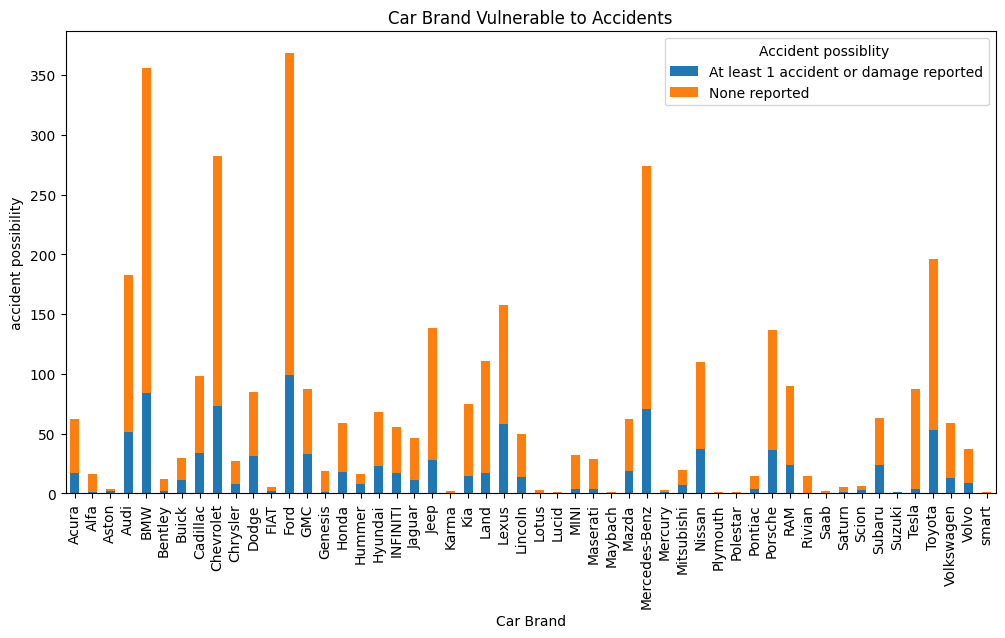

In [285]:
# A graph to show car brands with the most accidents
# Pivot the data to create a Dataframe with brands as index and accidents as columns
pivot_df=brand_accident.pivot_table(index="brand", columns="accident", values="count")
# creat a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# creat a stacked bar chart
pivot_df.plot(kind="bar", stacked=True, ax=ax)

# Set title and label
ax.set_title("Car Brand Vulnerable to Accidents")
ax.set_xlabel("Car Brand")
ax.set_ylabel("accident possibility")

# legend
ax.legend(title="Accident possiblity ")

# Show the plot
plt.show()

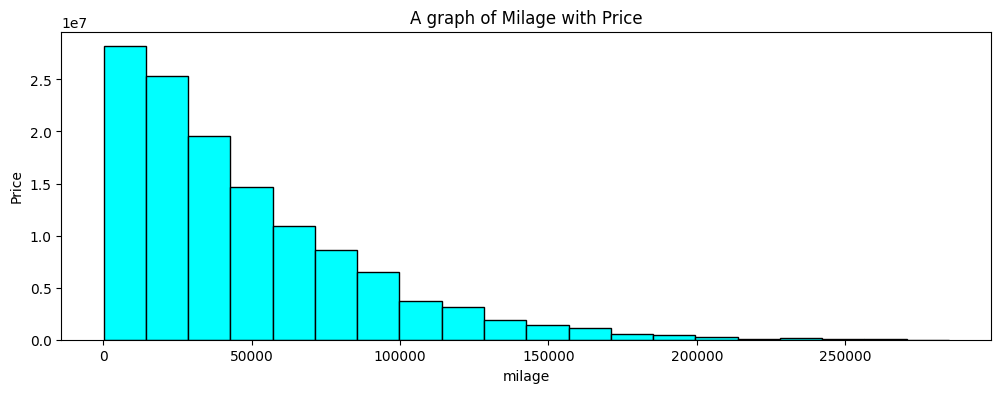

In [286]:
# A relationship showing how the price of the car varies with milage
plt.figure(figsize=(12, 4))
plt.hist(df_set['milage'] ,bins =20, weights=df_set['price'] , facecolor ='cyan',edgecolor ='black', linewidth = 1)
plt.xlabel('milage')
plt.ylabel('Price')
plt.title("A graph of Milage with Price")
plt.show()

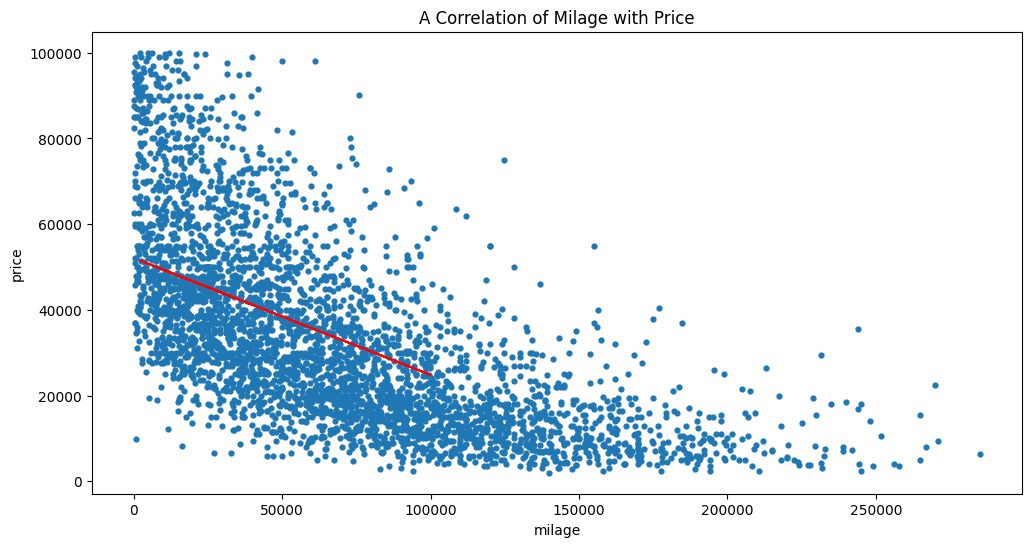

In [287]:
# Correlation between milage and price
plt.figure(figsize=(12, 6))

#calculate coefficients of linera regression
coeffs =np.polyfit(df_set.milage, df_set.price, 1)

# creat line from the coefficients
line = np.poly1d(coeffs)


# plot a scatter plot
plt.scatter(df_set.milage , df_set.price , s=12, marker='o')

# plot the line of best fit
plt.plot(df_set.price, line(df_set.price), color="red")

# Labels and Title
plt.xlabel('milage')
plt.ylabel('price')
plt.title("A Correlation of Milage with Price")

# show plot
plt.show ()

In [288]:
# creat dummies for different car brands
brand_dummies = pd.get_dummies(df_set.brand)
brand_dummies = brand_dummies.add_prefix("car_")
brand_dummies.head()

,car_Acura,car_Alfa,car_Aston,car_Audi,car_BMW,car_Bentley,car_Buick,car_Cadillac,car_Chevrolet,car_Chrysler,...,car_Saab,car_Saturn,car_Scion,car_Subaru,car_Suzuki,car_Tesla,car_Toyota,car_Volkswagen,car_Volvo,car_smart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [289]:
# Create dummies for different fuel types
fuel_dummies = pd.get_dummies(df_set.fuel_type)
fuel_dummies = fuel_dummies.add_prefix("fuel_")


fuel_dummies.head()

,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,fuel_–
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False


In [290]:
#Create dummies for the accidents columns
accident_dummies = pd.get_dummies(df_set.accident)
accident_dummies = accident_dummies.add_prefix("acc_")
accident_dummies.head()

,acc_At least 1 accident or damage reported,acc_None reported
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [291]:
# concate all columns together abd convert the data type to float
df_set = pd.concat([df_set, accident_dummies, fuel_dummies, brand_dummies], axis=1)
#df_set = df_set.astype("float32")
df_set.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,car_Saab,car_Saturn,car_Scion,car_Subaru,car_Suzuki,car_Tesla,car_Toyota,car_Volkswagen,car_Volvo,car_smart
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,False,False,False,False,False,False,False,False,False,False
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,False,False,False,False,False,False,False,False,False,False
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,False,False,False,False,False,False,False,False,False,False
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,False,False,False,False,False,False,False,False,False,False
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,False,False,False,False,False,False,False,False,False,False


In [292]:
# Describe the nature of the data set
df_set.describe()

,model_year,milage,price
count,3765.000000,3765.000000,3765.000000
mean,2015.297742,67513.294555,33671.489243
std,6.088247,50958.157859,21546.601202
min,1992.000000,100.000000,2000.000000
25%,2012.000000,26465.000000,16500.000000
50%,2017.000000,56985.000000,29800.000000
75%,2020.000000,96600.000000,45855.000000
max,2024.000000,285000.000000,99999.000000


In [293]:
# New information on the data types of the feature engineered data set
df_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3765 entries, 0 to 4008
Data columns (total 73 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   brand                                       3765 non-null   object 
 1   model                                       3765 non-null   object 
 2   model_year                                  3765 non-null   int64  
 3   milage                                      3765 non-null   float64
 4   fuel_type                                   3602 non-null   object 
 5   engine                                      3765 non-null   object 
 6   transmission                                3765 non-null   object 
 7   ext_col                                     3765 non-null   object 
 8   int_col                                     3765 non-null   object 
 9   accident                                    3664 non-null   object 
 10  clean_title      

In [294]:
# Drop original columns of brand, fuel type and accident
df_set=df_set.drop(columns=['brand', 'model', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'])

# Conver the data frame to a float data type
df_set = df_set.astype("float32")
df_set.head()

,model_year,milage,price,acc_At least 1 accident or damage reported,acc_None reported,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,...,car_Saab,car_Saturn,car_Scion,car_Subaru,car_Suzuki,car_Tesla,car_Toyota,car_Volkswagen,car_Volvo,car_smart
0,2013.0,51000.0,10300.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,34742.0,38005.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,22372.0,54598.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015.0,88900.0,15500.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,9835.0,34999.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
# The shape of the new data frame
df_set.shape

(3765, 64)

In [296]:
# Creat a set for features
X = df_set.drop(columns="price")
X

,model_year,milage,acc_At least 1 accident or damage reported,acc_None reported,fuel_Diesel,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,...,car_Saab,car_Saturn,car_Scion,car_Subaru,car_Suzuki,car_Tesla,car_Toyota,car_Volkswagen,car_Volvo,car_smart
0,2013.0,51000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,34742.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,22372.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015.0,88900.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,9835.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,2018.0,53705.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4005,2022.0,10900.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4006,2022.0,2116.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,2020.0,33000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
# Create a set for the target
y = df_set["price"]
y

0       10300.0
1       38005.0
2       54598.0
3       15500.0
4       34999.0
         ...   
4003    25900.0
4005    53900.0
4006    90998.0
4007    62999.0
4008    40000.0
Name: price, Length: 3765, dtype: float32

In [298]:
# feature selection Using PCA and Random forest method using GINNs importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected feature are selected in multicollinearity check part
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Find the shape of the training feature set
X_train.shape


(3012, 63)

In [299]:
# The shape for the testing feature set
X_test.shape

(753, 63)

<Axes: >

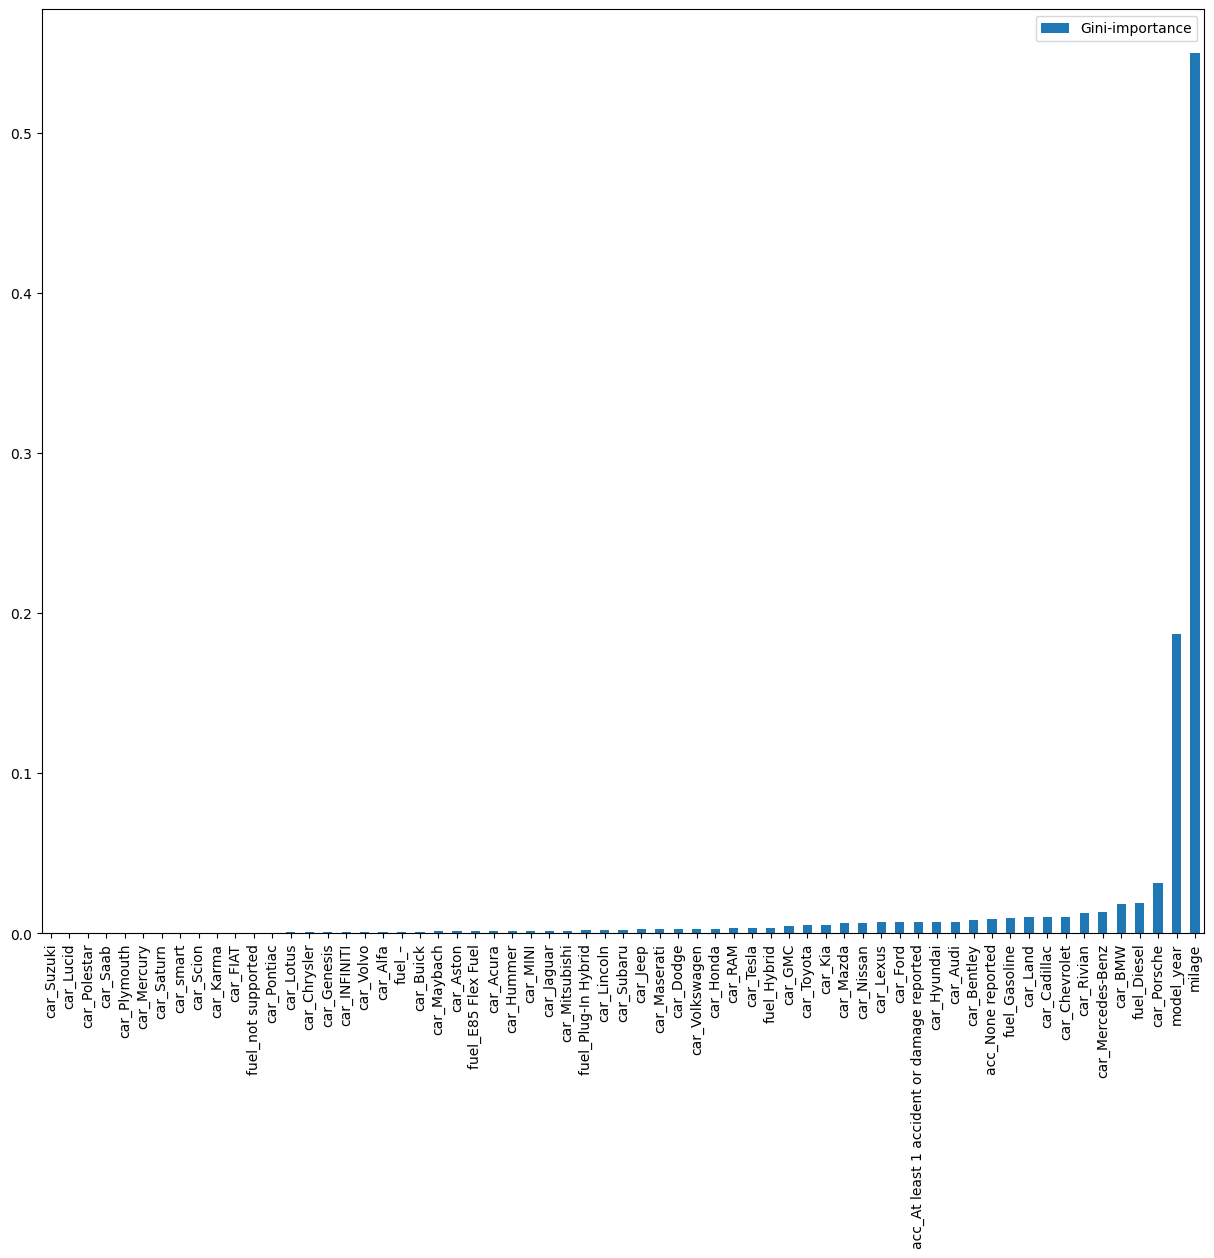

In [300]:
# Do the feature optimization uising Gini - imortance
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# a dict to hold feature_name: feature_importance
feats={}
for feature, importance in zip(X_train.columns, forest.feature_importances_):
    feats[feature]=importance # add the name/ value pair
importances=pd.DataFrame.from_dict(feats, orient="index").rename(columns={0: "Gini-importance"})
importances.sort_values(by="Gini-importance").plot(kind="bar", rot=90, figsize=(15,12))

<function matplotlib.pyplot.show(close=None, block=None)>

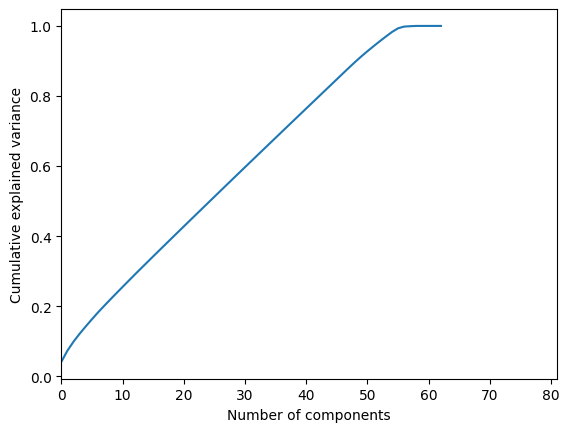

In [301]:
# uSING pca TO REDUCE THE FEATURES
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values
X_Train=np.asarray(X_Train)

# Finding normalized array of X_Train
X_std=StandardScaler().fit_transform(X_Train)
pca=PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show

In [302]:
# feature scaling: it helps to compare different scaled features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# std scaler
# minmax scaler(normalization)

In [303]:

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler=scaler
    X_scaler.fit(X=X, y=y)
    X_scaled=X_scaler.transform(X)
    y_scaler=scaler
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled=y_scaler.transform(y.values.reshape(-1,1))
    
    return X_scaled, y_scaled, X_scaler, y_scaler

In [304]:
# import the root mean squared error metric
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    """Convert the scaled error to actual error"""
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    #return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False)
    print("Error = "'{}'.format(rmse_error)+" in "+model_name)
    print("")
    
    return rmse_error, y_predict

In [305]:
# import classical machine learning models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [306]:
# define a custom function which can work on multiple machine learning models

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    y_predict=model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    y_predict=model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)
    if verbose:
        print("Train error="'{}'.format(train_error)+"in" +model_name)
        print("Test error="'{}'.format(test_error)+"in" +model_name)
    trained_model = model
    return trained_model, y_predict, train_error, test_error

In [307]:
# uSING the models without scaling and limiting features
regression_models = {
    "Ridge":linear_model.Ridge(),
    "Linear":LinearRegression(),
    "DecisionTree":tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "LGBM":LGBMRegressor(),
    "MLP":MLPRegressor(),
}
for model_name in regression_models.keys():
    _, y_predict, _, _=make_regression(
        X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=False)
    print("RMSE of:", model_name, mean_squared_error(y_test, y_predict, squared=False))

RMSE of: Ridge 13686.294
RMSE of: Linear 13845.65
RMSE of: DecisionTree 14207.646848115959
RMSE of: RandomForest 13274.330173105427
RMSE of: XGBoost 12586.088
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 3012, number of used features: 41
[LightGBM] [Info] Start training from score 33739.275232
RMSE of: LGBM 12767.889058961691
RMSE of: MLP 15254.713


In [308]:
# import the math library
from math import sqrt

# import the warning library
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# define dict to store our parameters

Pred_price={
    "Predicted_Prices": [],
}

pred_dict = {
    "regression_model":[],
    "feature_set":[],
    "scaler_name":[],
    "RMSE":[],
}

regression_models = {
    "Ridge":linear_model.Ridge(),
    "DecisionTree":tree.DecisionTreeRegressor(max_depth=6),
    "RandomForest":RandomForestRegressor(),
    "XGBoost":XGBRegressor(),
    "LGBM":LGBMRegressor(),
    "MLP":MLPRegressor(),
    "Linear":LinearRegression(),
    
}

scalers ={
    "Standard scaler": StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by="Gini-importance")[-40:].index.tolist(),
}

# Use the best performing model; The MLP model sith standard scaler and 40 features
regression_models ={
    "MLP":MLPRegressor(),
}
# Write 3 for loops inside each other
for feature_set_name in feature_sets.keys():
    feature_set= feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f".............scaled with {scaler_name}.............included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            if scaler_name=="NotScale":
                X = df_set[feature_set]
                y = df_set["price"]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
                
            else:
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled, regression_models[model_name], model_name, verbose=True)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
                
            pred_dict["regression_model"].append( model_name)
            pred_dict["feature_set"].append( feature_set_name)
            pred_dict["scaler_name"].append( scaler_name)
            pred_dict["RMSE"].append( rmse_error)
            
            Pred_price["Predicted_Prices"].append(y_predict)

    

.............scaled with Standard scaler.............included columns are selected_features_40



Train error=0.5121332406997681inMLP
Test error=0.5786188840866089inMLP
Error = 12465.6142578125 in MLP



In [309]:
# choose the perform model and extract the predictions for preparation duration
Pred_price["Predicted_Prices"]
Pred_price
 

{'Predicted_Prices': [array([[16087.663  ],
         [ 8296.63   ],
         [57693.344  ],
         [65643.85   ],
         [30361.648  ],
         [11037.294  ],
         [15031.755  ],
         [55624.63   ],
         [31231.246  ],
         [26562.555  ],
         [35691.633  ],
         [29609.672  ],
         [48164.926  ],
         [18133.342  ],
         [43998.52   ],
         [10012.864  ],
         [27676.105  ],
         [59524.72   ],
         [10666.192  ],
         [20212.688  ],
         [35126.043  ],
         [45582.96   ],
         [40414.56   ],
         [52311.445  ],
         [19042.357  ],
         [13814.812  ],
         [38463.1    ],
         [19981.691  ],
         [45827.13   ],
         [39933.996  ],
         [33584.79   ],
         [21169.791  ],
         [16898.283  ],
         [ 9392.628  ],
         [ 4522.0537 ],
         [47141.516  ],
         [22664.959  ],
         [12524.433  ],
         [13207.192  ],
         [37670.723  ],
         [62836.75  

In [310]:
df = pd.DataFrame(Pred_price)
df=df.explode("Predicted_Prices")
df["Predicted_Prices"]= df["Predicted_Prices"].astype(float)
df = df.reset_index(drop=True)
df

,Predicted_Prices
0,16087.663086
1,8296.629883
2,57693.343750
3,65643.851562
4,30361.648438
...,...
748,39344.285156
749,42030.070312
750,85825.953125
751,23210.650391


In [311]:
Predicted_Price= round(df["Predicted_Prices"], 0)
Predicted_Price

0      16088.0
1       8297.0
2      57693.0
3      65644.0
4      30362.0
        ...   
748    39344.0
749    42030.0
750    85826.0
751    23211.0
752    68500.0
Name: Predicted_Prices, Length: 753, dtype: float64

In [312]:
y_test = y_test.reset_index(drop=True)
y_test

0      18950.0
1      37999.0
2      49000.0
3      89900.0
4      27900.0
        ...   
748    48995.0
749    43500.0
750    92000.0
751    26000.0
752    39995.0
Name: price, Length: 753, dtype: float32

In [313]:
comparison_df1= pd.DataFrame(
    {
        'id':X_test.index.astype(int), 
        'Actual_Price':y_test,
        'Predicted_Price': round(df["Predicted_Prices"], 0)
        },
        )

comparison_df= comparison_df1.reset_index(drop=True)
comparison_df.set_index("id", inplace=True)
comparison_df

,Actual_Price,Predicted_Price
id,,
1667,18950.0,16088.0
3185,37999.0,8297.0
239,49000.0,57693.0
3162,89900.0,65644.0
2112,27900.0,30362.0
...,...,...
1087,48995.0,39344.0
3135,43500.0,42030.0
2754,92000.0,85826.0


<function matplotlib.pyplot.show(close=None, block=None)>

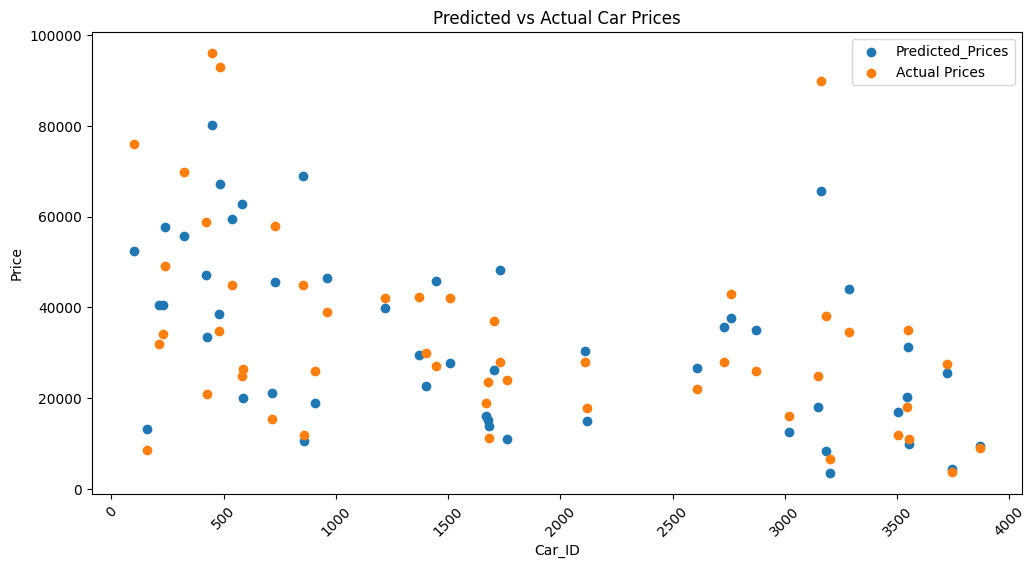

In [314]:
# A scatter plot showing the visualisation of predicted prices and actual prices of fifty used cars
plt.figure(figsize=(12, 6))
plt.scatter(comparison_df.index[:50],comparison_df.Predicted_Price[:50], label = "Predicted_Prices")
plt.scatter(comparison_df.index[:50],comparison_df.Actual_Price[:50], label="Actual Prices")

plt.xlabel("Car_ID")
plt.ylabel("Price")
plt.title("Predicted vs Actual Car Prices")
plt.legend()
plt.xticks(rotation=45)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

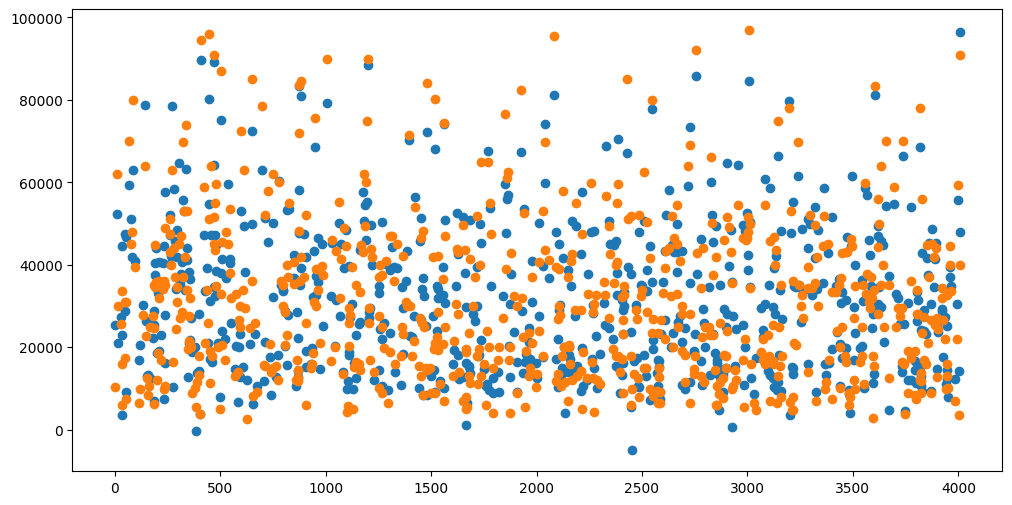

In [315]:
plt.figure(figsize=(12, 6))
# calculate absolute error
error = np.abs(np.array(comparison_df.Predicted_Price)-np.array(comparison_df.Actual_Price))

# define threshold value
threshold = 0.2*max(comparison_df.Actual_Price)

# Create a mask to slect data points with close predictions
mask = error< threshold

# Plot close predictions
plt.scatter(comparison_df.index[mask], comparison_df.Predicted_Price[mask], label = "Close predictions")
plt.scatter(comparison_df.index[mask], comparison_df.Actual_Price[mask], label="Actual Price")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

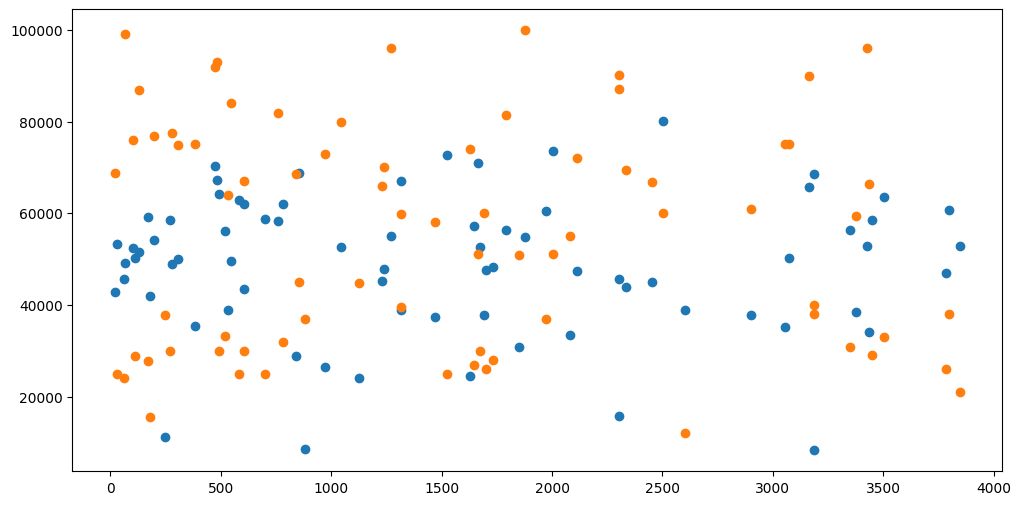

In [316]:
plt.figure(figsize=(12, 6))
# plot non close predictions
plt.scatter(comparison_df.index[~mask], comparison_df.Predicted_Price[~mask], label = "Close predictions")
plt.scatter(comparison_df.index[~mask], comparison_df.Actual_Price[~mask], label="Actual Price")

plt.show